Welcome to  your first Classification Tasks
Get Ready to Dig in Classification World

# **Classifiers**


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn import tree

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


Do you remember Label Encoding ?
Look at this

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=0 )
X_train

array([[15664907, 'Male', 58, 144000],
       [15605000, 'Female', 59, 83000],
       [15649136, 'Female', 24, 55000],
       ...,
       [15591433, 'Male', 36, 52000],
       [15776348, 'Female', 27, 54000],
       [15794661, 'Female', 26, 118000]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15664907, 1, 58, 144000],
       [15605000, 0, 59, 83000],
       [15649136, 0, 24, 55000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

# Build a Logistic Regression

1. From Sk Learn Try to build a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Fit the Model to Training Set
lg=LogisticRegression(random_state=0)
lg.fit(X_train,y_train)
#Predict The Testing Set
train_preds = lg.predict(X_train)
test_preds = lg.predict(X_test)

# **Confusion Matrix**  



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


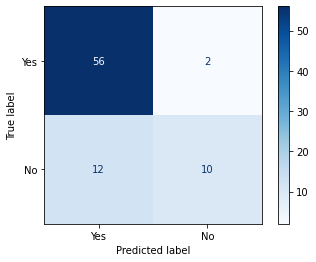

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(lg, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds)
cm

array([[56,  2],
       [12, 10]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
acc = accuracy_score(y_test,test_preds)
print(acc)

0.825


In [ ]:
pre = precision_score(y_test,test_preds)
print(pre)

0.8333333333333334


In [ ]:
re = recall_score(y_test,test_preds)
print(re)

0.45454545454545453


In [ ]:
f1 = f1_score(y_test,test_preds)
print(re)

0.45454545454545453


# **Saving And Loading Models**

In [ ]:
import pickle
# save the model to disk
filename = '3atrees.sav'
pickle.dump(lg, open(filename, 'wb'))

In [ ]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.825


In [ ]:
# inference
#import pickle

#loaded_model = pickle.load(open(filename, 'rb'))
#loaded_model.predict(X_predict)

# Things Now Get More Tense
Build the Following Codes
* K - Nearest Neighbours
* SVM [ Linear ]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train,y_train)
#Predict The Testing Set
train_preds = neigh.predict(X_train)
test_preds = neigh.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


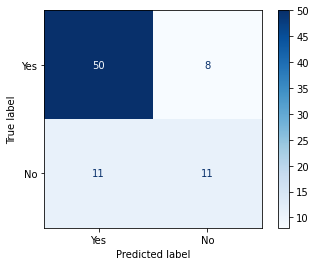

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(neigh, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds)
cm

array([[41, 17],
       [11, 11]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
acc = accuracy_score(y_test,test_preds)
print(acc)

0.7625


In [ ]:
pre = precision_score(y_test,test_preds)
print(pre)

0.375


In [ ]:
re = recall_score(y_test,test_preds)
print(re)

0.4090909090909091


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        58
           1       0.59      0.45      0.51        22

    accuracy                           0.76        80
   macro avg       0.70      0.67      0.68        80
weighted avg       0.75      0.76      0.75        80

